# Melihat Data yang Diambil dari Twitter

**Melakukan import Library**

Pertama, lakukan import library yang dibutuhkan berikut:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

from matplotlib.widgets import Slider, Button, RadioButtons

import math
import operator
import glob

**Melakukan Persiapan Data**

Membaca file CSV yang berisi scraping data Twitter pada periode sebelum terjadi COVID-19

In [2]:
tweet_data_before_covid_df = pd.DataFrame()

for files in glob.glob("data/noncovid/*.csv"):
    tweet_data_before_covid_files = pd.read_csv(files)
    tweet_data_before_covid_df = tweet_data_before_covid_df.append(tweet_data_before_covid_files)
    
#menghapus rows yang redudant
tweet_data_before_covid_df = pd.DataFrame.drop_duplicates(tweet_data_before_covid_df)

Membaca file CSV yang berisi scraping data Twitter pada periode saat terjadi COVID-19

In [3]:
tweet_data_during_covid_df = pd.DataFrame()

for files in glob.glob("data/covid/*.csv"):
    tweet_data_during_covid_files = pd.read_csv(files)
    tweet_data_during_covid_df = tweet_data_during_covid_df.append(tweet_data_during_covid_files)
    
#menghapus rows yang redudant
tweet_data_during_covid_df = pd.DataFrame.drop_duplicates(tweet_data_during_covid_df)

# Melakukan Analisis Data Twitter

Analisis data ini menggunakan data Twitter dengan dua periode waktu, yaitu:
1. Periode Sebelum Pandemi COVID-19 (01-01-2020 sampai 08-02-2020)
1. Periode Saat Pandemi COVID-19 (01-04-2020 sampai 08-05-2020)

Deklarasi function untuk menampilkan column value setiap grafik

In [4]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.000*height, 
             '%d'%int(height),
             ha = 'center', va = 'bottom', rotation = 0, 
    fontsize=9)

        
def grouped_autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Deklarasi function untuk menampilkan keterangan grafik

In [5]:
def graphics_explanation(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

**Berdasarkan Jumlah Pengguna per Periode**

**1. Total Jumlah Pengguna** 

Jumlah pengguna sebelum pandemi COVID-19 dan saat pandemi COVID-19

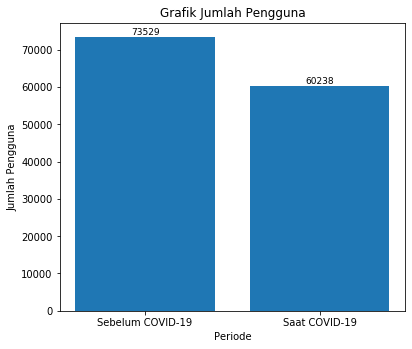

In [6]:
user_before_covid_count = len(pd.unique(tweet_data_before_covid_df['username']))
user_during_covid_count = len(pd.unique(tweet_data_during_covid_df['username']))

user_period = ['Sebelum COVID-19','Saat COVID-19']
user_count = [user_before_covid_count, user_during_covid_count]

user_count_bar = plt.bar(user_period,user_count, align='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.1)

autolabel(user_count_bar)
graphics_explanation('Periode', 'Jumlah Pengguna', 'Grafik Jumlah Pengguna')

plt.show()

**2. Persentase Jumlah Pengguna**

Melihat perbandingan persentase dari dua periode tersebut

In [7]:
user_count_before_covid_percentage = (user_before_covid_count/(user_before_covid_count+user_during_covid_count)*100)
user_count_during_covid_percentage = (user_during_covid_count/(user_before_covid_count+user_during_covid_count)*100)

print('')
print('Persentase Pengguna sebelum Pandemi COVID-19:', round(user_count_before_covid_percentage, 2),'%')
print('Persentase Pengguna saat Pandemi COVID-19:', round(user_count_during_covid_percentage, 2),'%')


Persentase Pengguna sebelum Pandemi COVID-19: 54.97 %
Persentase Pengguna saat Pandemi COVID-19: 45.03 %


**Berdasarkan Jumlah Tweet per Periode**

**1. Total Jumlah Tweet**

Jumlah postingan sebelum pandemi COVID-19 dan saat pandemi COVID-19

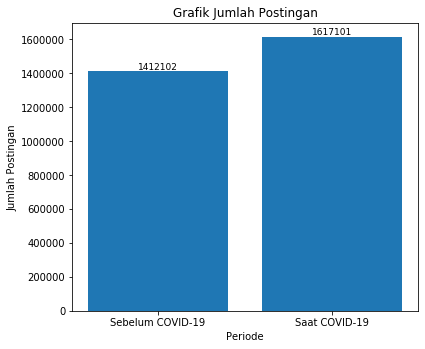

In [8]:
post_before_covid_count = len(tweet_data_before_covid_df.index)
post_during_covid_count = len(tweet_data_during_covid_df.index)

post_period = ['Sebelum COVID-19','Saat COVID-19']
post_count = [post_before_covid_count, post_during_covid_count]

post_count_bar = plt.bar(post_period,post_count, align='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.1)

autolabel(post_count_bar)
graphics_explanation('Periode', 'Jumlah Postingan', 'Grafik Jumlah Postingan')

plt.show()

**2. Persentase Jumlah Postingan**

Melihat perbandingan persentase psotingan dari dua periode tersebut

In [9]:
post_count_before_covid_percentage = (post_before_covid_count/(post_before_covid_count+post_during_covid_count)*100)
post_count_during_covid_percentage = (post_during_covid_count/(post_before_covid_count+post_during_covid_count)*100)

print('')
print('Persentase Postingan sebelum Pandemi COVID-19:', round(post_count_before_covid_percentage, 2),'%')
print('Persentase Postingan saat Pandemi COVID-19:', round(post_count_during_covid_percentage, 2),'%')


Persentase Postingan sebelum Pandemi COVID-19: 46.62 %
Persentase Postingan saat Pandemi COVID-19: 53.38 %


**Berdasarkan Jumlah Postingan dan Waktu**

**1. Postingan Perhari**

a. Jumlah postingan per-hari sebelum pandemi COVID-19

In [10]:
#deklarasi sebuah dataframe
tweet_each_day_before_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
tweet_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["date"].count()

#masukkan data jumlah psotingan setiap hari ke dataframe
tweet_each_day_before_covid_df = pd.DataFrame(tweet_each_day_before_covid)
tweet_each_day_before_covid_df = tweet_each_day_before_covid_df.rename(columns={'date': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_day_before_covid_percentage = []
for i, row in tweet_each_day_before_covid_df.iterrows():
    tweet_each_day_before_covid_percentage.append(round((row['tweet_count']/tweet_each_day_before_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_day_before_covid_df['percentage (%)'] = tweet_each_day_before_covid_percentage

tweet_each_day_before_covid_df

,tweet_count,percentage (%)
date,,
2019-12-14,12599,0.89
2019-12-15,15399,1.09
2019-12-16,15399,1.09
2019-12-17,16499,1.17
2019-12-18,15291,1.08
...,...,...
2020-03-10,16445,1.16
2020-03-11,17307,1.23
2020-03-12,17759,1.26


b. Jumlah postingan per-hari saat pandemi COVID-19

In [11]:
#deklarasi sebuah dataframe
tweet_each_day_during_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
tweet_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["date"].count()

#masukkan data jumlah psotingan setiap hari ke dataframe
tweet_each_day_during_covid_df = pd.DataFrame(tweet_each_day_during_covid)
tweet_each_day_during_covid_df = tweet_each_day_during_covid_df.rename(columns={'date': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_day_during_covid_percentage = []
for i, row in tweet_each_day_during_covid_df.iterrows():
    tweet_each_day_during_covid_percentage.append(round((row['tweet_count']/tweet_each_day_during_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_day_during_covid_df['percentage (%)'] = tweet_each_day_during_covid_percentage

tweet_each_day_during_covid_df

,tweet_count,percentage (%)
date,,
2020-03-14,19201,1.19
2020-03-15,19759,1.22
2020-03-16,20151,1.25
2020-03-17,18868,1.17
2020-03-18,18940,1.17
...,...,...
5/27/20,15665,0.97
5/28/20,15571,0.96
5/29/20,15113,0.93


Menambahkan kolom date ke dataframe **tweet_data_before_covid_sort** dan **tweet_data_during_covid_sort**

In [12]:
#menambahkan kolom date ke dataframe tweet_data_before_covid_sort
tweet_data_before_covid_sort = tweet_data_before_covid_df['date'].sort_values(ascending=True)
date_before_covid_sort = tweet_data_before_covid_sort.unique().tolist()

tweet_each_day_before_covid_df['date'] = date_before_covid_sort

#menambahkan kolom date ke dataframe tweet_data_before_covid_sort
tweet_data_during_covid_sort = tweet_data_during_covid_df['date'].sort_values(ascending=True)
date_during_covid_sort = tweet_data_during_covid_sort.unique().tolist()

tweet_each_day_during_covid_df['date'] = date_during_covid_sort

**2. Jumlah Postingan per-Hari**

Membuat fungsi convert date, untuk mengecek nilai kolom date apakah merupakan format date atau tidak, kemudian dikonversi dari tipe date string string ke datestring objects.

In [13]:
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

Melakukan convert date untuk setiap data

In [14]:
import datetime
from datetime import datetime

def convert_dates(df):
    for i, date in enumerate(df['date']):
        df.iloc[i, df.columns.get_loc('date')] = dateOrNotToDate(date)
        
#convert_dates(tweet_each_day_before_covid_df)
#convert_dates(tweet_each_day_during_covid_df)

Fungsi untuk mengecek nama hari berdasarkan tanggal tertentu

In [15]:
import datetime
from datetime import datetime

days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

date_label = datetime.strptime('2020-01-01', '%Y-%m-%d')
print('Hari: ',days[date_label.weekday()])

Hari:  Wednesday


Menambahkan kolom day ke dalam dataframe **tweet_each_day_before_covid_df** dan **tweet_each_day_during_covid_df**

In [16]:
#menambahkan data sebelum COVID-19
day_name_before_covid = []
for i, row in tweet_each_day_before_covid_df.iterrows():
    try:
        date_value = datetime.strptime(row['date'], '%Y-%m-%d')
    except:
        date_value = datetime.strptime(row['date'], '%m/%d/%y')
    day_name_before_covid.append(days[date_value.weekday()])
    
#menambahkan data saat COVID-19
day_name_during_covid = []
for i, row in tweet_each_day_during_covid_df.iterrows():
    try:
        date_value = datetime.strptime(row['date'], '%Y-%m-%d')
    except:
        date_value = datetime.strptime(row['date'], '%m/%d/%y')
    day_name_during_covid.append(days[date_value.weekday()])

menambahkan list day_name ke dalam dataframe **tweet_each_day_before_covid_df** dan **tweet_each_day_during_covid_df**

In [17]:
#menambahkan list day_name
tweet_each_day_before_covid_df['day_name'] = day_name_before_covid
tweet_each_day_during_covid_df['day_name'] = day_name_during_covid

#jumlahkan postingan yang berada setiap day_name
tweet_each_dayname_before_covid = tweet_each_day_before_covid_df.groupby(['day_name'])['tweet_count'].sum().reset_index()
tweet_each_dayname_during_covid = tweet_each_day_during_covid_df.groupby(['day_name'])['tweet_count'].sum().reset_index()

a. Menampilkan grafik data setiap label hari pada periode sebelum COVID-19

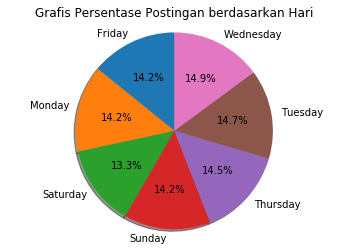

In [18]:
labels = tweet_each_dayname_before_covid['day_name'].tolist()
sizes = tweet_each_dayname_before_covid['tweet_count'].tolist()
explode = (0, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal') 

graphics_explanation('', '', 'Grafis Persentase Postingan berdasarkan Hari')

plt.show()

b. Menampilkan grafik data setiap label hari pada periode saat COVID-19

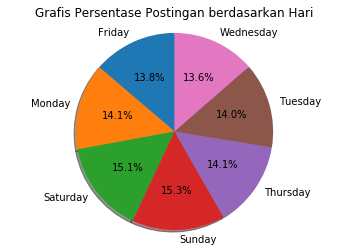

In [19]:
labels = tweet_each_dayname_during_covid['day_name'].tolist()
sizes = tweet_each_dayname_during_covid['tweet_count'].tolist()
explode = (0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

graphics_explanation('', '', 'Grafis Persentase Postingan berdasarkan Hari')

plt.show()

Melihat perbandingan postingan ketika belum COVID-19 dan saat COVID-19

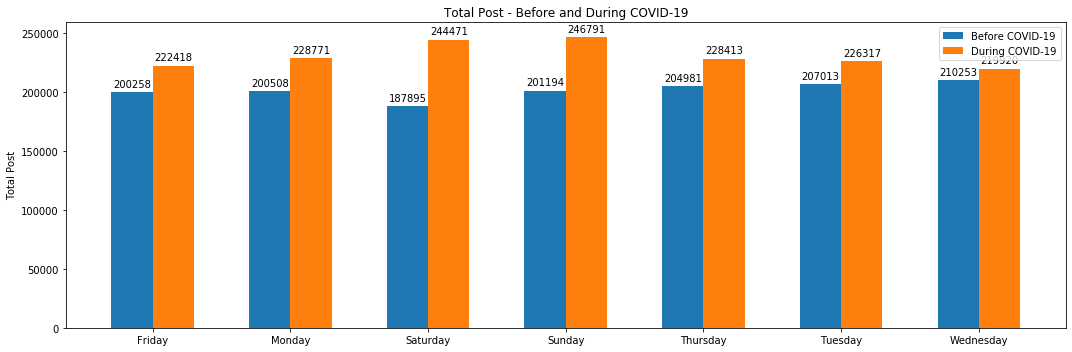

In [20]:
day_labels = tweet_each_dayname_during_covid['day_name'].tolist()
each_day_before_covid = tweet_each_dayname_before_covid['tweet_count'].tolist()
each_day_during_covid = tweet_each_dayname_during_covid['tweet_count'].tolist()

x = np.arange(len(day_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((15, 5)))
rects1 = ax.bar(x - width/2, each_day_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, each_day_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Post')
ax.set_title('Total Post - Before and During COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(day_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

Jumlah user aktif pada setiap hari sebelum COVID-19

In [21]:
#deklarasi sebuah dataframe
useractive_each_day_before_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
useractive_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["username"].count()

#masukkan data jumlah postingan setiap hari ke dataframe
useractive_each_day_before_covid_df = pd.DataFrame(useractive_each_day_before_covid)
useractive_each_day_before_covid_df = useractive_each_day_before_covid_df.rename(columns={'username': 'user_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
useractive_each_day_before_covid_percentage = []
for i, row in useractive_each_day_before_covid_df.iterrows():
    useractive_each_day_before_covid_percentage.append(round((row['user_count']/useractive_each_day_before_covid_df['user_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
useractive_each_day_before_covid_df['percentage (%)'] = useractive_each_day_before_covid_percentage

useractive_each_day_before_covid_df

,user_count,percentage (%)
date,,
2019-12-14,12599,0.89
2019-12-15,15399,1.09
2019-12-16,15399,1.09
2019-12-17,16499,1.17
2019-12-18,15291,1.08
...,...,...
2020-03-10,16445,1.16
2020-03-11,17307,1.23
2020-03-12,17759,1.26


Jumlah user aktif pada setiap hari saat COVID-19

In [22]:
#deklarasi sebuah dataframe
useractive_each_day_during_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
useractive_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["username"].count()

#masukkan data jumlah postingan setiap hari ke dataframe
useractive_each_day_during_covid_df = pd.DataFrame(useractive_each_day_during_covid)
useractive_each_day_during_covid_df = useractive_each_day_during_covid_df.rename(columns={'username': 'user_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
useractive_each_day_during_covid_percentage = []
for i, row in useractive_each_day_during_covid_df.iterrows():
    useractive_each_day_during_covid_percentage.append(round((row['user_count']/useractive_each_day_during_covid_df['user_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
useractive_each_day_during_covid_df['percentage (%)'] = useractive_each_day_during_covid_percentage

useractive_each_day_during_covid_df

,user_count,percentage (%)
date,,
2020-03-14,19201,1.19
2020-03-15,19759,1.22
2020-03-16,20151,1.25
2020-03-17,18868,1.17
2020-03-18,18940,1.17
...,...,...
5/27/20,15665,0.97
5/28/20,15571,0.96
5/29/20,15113,0.93


**Melihat berdasarkan Jam**

a. Melihat jumlah tweets berdasarkan jam pada periode sebelum COVID-19

In [23]:
#memisahkan hour dari kolom nilai time
tweet_each_hour_before_covid_filter = pd.to_datetime(tweet_data_before_covid_df['time'], format='%H:%M:%S').dt.hour

#menambahkan kolom baru dengan nilai hour
tweet_each_hour_before_covid = tweet_data_before_covid_df.copy()
tweet_each_hour_before_covid['hour'] = tweet_each_hour_before_covid_filter

#jumlahkan tweets setiap jam 
tweet_each_hour_before_covid_count = tweet_each_hour_before_covid.groupby("hour")["hour"].count()

#masukkan data jumlah postingan setiap jam ke dataframe
tweet_each_hour_before_covid_df = pd.DataFrame(tweet_each_hour_before_covid_count)
tweet_each_hour_before_covid_df = tweet_each_hour_before_covid_df.rename(columns={'hour': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_hour_before_covid_percentage = []
for i, row in tweet_each_hour_before_covid_df.iterrows():
    tweet_each_hour_before_covid_percentage.append(round((row['tweet_count']/tweet_each_hour_before_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_hour_before_covid_df['percentage (%)'] = tweet_each_hour_before_covid_percentage

tweet_each_hour_before_covid_df = tweet_each_hour_before_covid_df.sort_values(by=['hour'], ascending=True)

tweet_each_hour_before_covid_df.sort_values(by=['tweet_count'], ascending=False)

,tweet_count,percentage (%)
hour,,
12,73929,5.24
13,73639,5.21
15,73307,5.19
14,73215,5.18
11,73100,5.18
16,71398,5.06
22,71189,5.04
10,69471,4.92
17,68863,4.88


b. Melihat jumlah tweets berdasarkan jam pada periode saat COVID-19

In [24]:
#memisahkan hour dari kolom nilai time
tweet_each_hour_during_covid_filter = pd.to_datetime(tweet_data_during_covid_df['time'], format='%H:%M:%S').dt.hour

#menambahkan kolom baru dengan nilai hour
tweet_each_hour_during_covid = tweet_data_during_covid_df.copy()
tweet_each_hour_during_covid['hour'] = tweet_each_hour_during_covid_filter

#jumlahkan tweets setiap jam 
tweet_each_hour_during_covid_count = tweet_each_hour_during_covid.groupby("hour")["hour"].count()

#masukkan data jumlah postingan setiap jam ke dataframe
tweet_each_hour_during_covid_df = pd.DataFrame(tweet_each_hour_during_covid_count)
tweet_each_hour_during_covid_df = tweet_each_hour_during_covid_df.rename(columns={'hour': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_hour_during_covid_percentage = []
for i, row in tweet_each_hour_during_covid_df.iterrows():
    tweet_each_hour_during_covid_percentage.append(round((row['tweet_count']/tweet_each_hour_during_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_hour_during_covid_df['percentage (%)'] = tweet_each_hour_during_covid_percentage

tweet_each_hour_during_covid_df = tweet_each_hour_during_covid_df.sort_values(by=['hour'], ascending=False)

tweet_each_hour_during_covid_df.sort_values(by=['tweet_count'], ascending=False)

,tweet_count,percentage (%)
hour,,
12,100967,6.24
13,100525,6.22
11,99891,6.18
14,98603,6.10
15,98354,6.08
10,85806,5.31
16,85537,5.29
9,78134,4.83
5,78087,4.83


Grafik perbandingan sebelum dan saat COVID-19 berdasarkan Jam

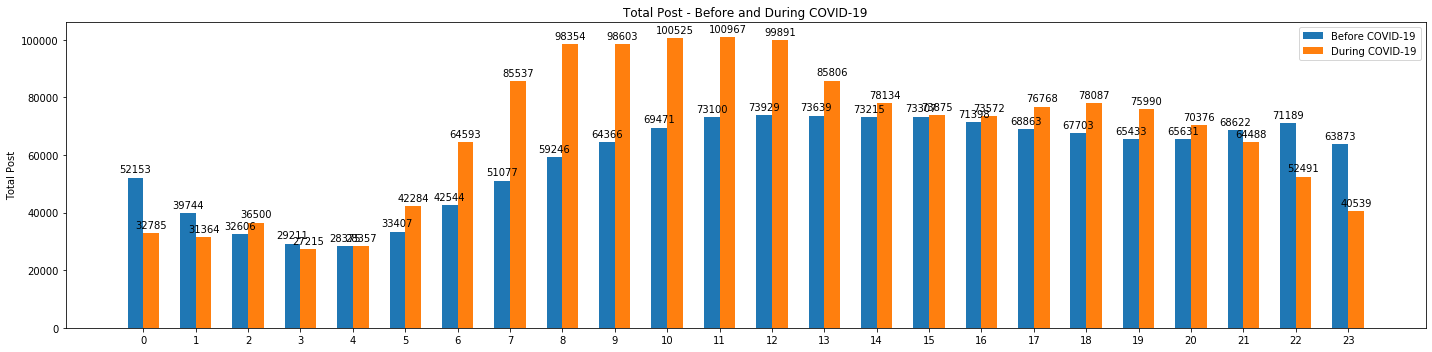

In [25]:
time_labels = tweet_each_hour_before_covid_df.index.tolist()
each_hour_before_covid = tweet_each_hour_before_covid_df['tweet_count'].tolist()
each_hour_during_covid = tweet_each_hour_during_covid_df['tweet_count'].tolist()

x = np.arange(len(time_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((20, 5)))
rects1 = ax.bar(x - width/2, each_hour_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, each_hour_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Post')
ax.set_title('Total Post - Before and During COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(time_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

**Melihat Data Jumlah Aktivitas Tweet**

**1. Berdasarkan Pengguna**

a. Melihat jumlah postingan berdasarkan pengguna pada periode sebelum COVID-19

In [26]:
#jumlahkan postingan yang berada setiap perhari 
tweet_by_user_before_covid = tweet_data_before_covid_df.groupby("username")["username"].count()

print('Melihat pengguna yang paling sering melakukan tweet')
print(tweet_by_user_before_covid.sort_values(ascending=False).head(10))
#print('')
#print('Melihat pengguna yang paling jarang melakukan tweet')
#print(tweet_by_user_before_covid.sort_values(ascending=True).head(10))

Melihat pengguna yang paling sering melakukan tweet
username
hidayathhp        7498
eattyl            5105
askmearmything    4804
mauludirfd        4131
bentarabumi       3948
bangwird_         3805
rockerspantura    2789
sonorafm92        2764
kangsemproel      2758
ma69num           2567
Name: username, dtype: int64


b. Melihat jumlah postingan berdasarkan pengguna pada periode saat COVID-19

In [27]:
#jumlahkan postingan yang berada setiap perhari 
tweet_by_user_during_covid = tweet_data_during_covid_df.groupby("username")["username"].count()

print('Melihat pengguna yang paling sering melakukan tweet')
print(tweet_by_user_during_covid.sort_values(ascending=False).head(10))
#print('')
#print('Melihat pengguna yang paling jarang melakukan tweet')
#print(tweet_by_user_during_covid.sort_values(ascending=True).head(10))

Melihat pengguna yang paling sering melakukan tweet
username
eattyl            8578
sindonews         6042
hidayathhp        5940
mrpluviophile     5261
bagaswdykt        5103
cagubnyinyir2     4971
psybougenville    4557
zae25__           4378
initioo           4091
evianafs          3893
Name: username, dtype: int64


Melihat perubahan jumlah Tweet dari pengguna tertentu

In [28]:
#cek perbedaan pada user tertentu
print('Username:', 'hidayathhp')
print('Jumlah sebelum COVID-19:', tweet_by_user_before_covid['hidayathhp'])
print('Jumlah saat COVID-19:', tweet_by_user_during_covid['hidayathhp'])

Username: hidayathhp
Jumlah sebelum COVID-19: 7498
Jumlah saat COVID-19: 5940


**Melihat aktivitas jumlah mentions dan reply_to**

**1. Berdasarkan Pengguna**

a. Melihat jumlah mentions dan reply_to berdasarkan pengguna pada periode sebelum COVID-19

In [29]:
#jumlahkan mentions keseluruhan
all_mentions_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['mentions'] != '[]']
all_mentions_by_user_before_covid = all_mentions_notnull_before_covid.count()

#jumlahkan reply_to keseluruhan
all_replyto_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['reply_to'] != '[]']
all_replyto_by_user_before_covid = all_replyto_notnull_before_covid.count()

#jumlahkan mentions per user
mentions_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['mentions'] != '[]']
mentions_by_user_before_covid = mentions_notnull_before_covid.groupby("username")["mentions"].count()

#jumlahkan reply_to per user
replyto_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['reply_to'] != '[]']
replyto_by_user_before_covid = replyto_notnull_before_covid.groupby("username")["reply_to"].count()

print('Melihat keseluruhan jumlah mentions', all_mentions_by_user_before_covid['mentions'])
print('Melihat keseluruhan jumlah reply_to:', all_replyto_by_user_before_covid['reply_to'])
print('')
print('Melihat pengguna yang paling sering melakukan mentions')
print(mentions_by_user_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering melakukan reply_to')
print(replyto_by_user_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan jumlah mentions 88055
Melihat keseluruhan jumlah reply_to: 558520

Melihat pengguna yang paling sering melakukan mentions
username
sonorafm92        2526
cagubnyinyir2     1359
dinsihcakung       794
imam_rachman_      584
agusawe            538
alwike1            501
hadiprayitno82     495
idberry            382
chairulachir       365
ari_aditya         280
Name: mentions, dtype: int64

Melihat pengguna yang paling sering melakukan reply_to
username
hidayathhp        3915
askmearmything    2889
eattyl            2511
bentarabumi       2227
bangwird_         2205
kangsemproel      2170
mauludirfd        1899
aselisini         1430
ma69num           1396
areefabdnas       1388
Name: reply_to, dtype: int64


b. Melihat jumlah mentions berdasarkan pengguna pada periode saat COVID-19

In [30]:
#jumlahkan mentions keseluruhan
all_mentions_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['mentions'] != '[]']
all_mentions_by_user_during_covid = all_mentions_notnull_during_covid.count()

#jumlahkan reply_to keseluruhan
all_replyto_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['reply_to'] != '[]']
all_replyto_by_user_during_covid = all_replyto_notnull_during_covid.count()

#jumlahkan mentions per user
mentions_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['mentions'] != '[]']
mentions_by_user_during_covid = mentions_notnull_during_covid.groupby("username")["mentions"].count()

#jumlahkan reply_to per user
replyto_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['reply_to'] != '[]']
replyto_by_user_during_covid = replyto_notnull_during_covid.groupby("username")["reply_to"].count()

print('Melihat keseluruhan jumlah mentions', all_mentions_by_user_during_covid['mentions'])
print('Melihat keseluruhan jumlah reply_to:', all_replyto_by_user_during_covid['reply_to'])
print('')
print('Melihat pengguna yang paling sering melakukan mentions')
print(mentions_by_user_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering melakukan reply_to')
print(replyto_by_user_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan jumlah mentions 86378
Melihat keseluruhan jumlah reply_to: 690716

Melihat pengguna yang paling sering melakukan mentions
username
cagubnyinyir2     3838
hadiprayitno82    1525
dyangrenggani     1291
dinsihcakung      1172
mamavanenbas      1089
idberry            621
info4marwan        565
chairulachir       337
imam_rachman_      333
ari_aditya         313
Name: mentions, dtype: int64

Melihat pengguna yang paling sering melakukan reply_to
username
eattyl             4387
hidayathhp         3481
mrpluviophile      3392
bagaswdykt         2921
psybougenville     2550
initioo            2489
evianafs           2330
zae25__            2285
kwhdirect3phase    2275
kobarijakarta      1999
Name: reply_to, dtype: int64


**2. Berdasarkan Waktu Hari**

a. Melihat jumlah mentions dan reply_to berdasarkan hari pada periode sebelum COVID-19

In [31]:
#jumlahkan mentions keseluruhan
all_mentions_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['mentions'] != '[]']
all_mentions_each_day_before_covid = all_mentions_notnull_before_covid.count()

#jumlahkan reply_to keseluruhan
all_replyto_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['reply_to'] != '[]']
all_replyto_each_day_before_covid = all_replyto_notnull_before_covid.count()

#jumlahkan mentions per user
mentions_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['mentions'] != '[]']
mentions_each_day_before_covid = mentions_notnull_before_covid.groupby("date")["mentions"].count()

#jumlahkan reply_to per user
replyto_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['reply_to'] != '[]']
replyto_each_day_before_covid = replyto_notnull_before_covid.groupby("date")["reply_to"].count()

print('Melihat keseluruhan jumlah mentions', all_mentions_each_day_before_covid['mentions'])
print('Melihat keseluruhan jumlah reply_to:', all_replyto_each_day_before_covid['reply_to'])
print('')
print('Melihat hari yang paling sering banyak mentions')
print(mentions_each_day_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak reply_to')
print(replyto_each_day_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan jumlah mentions 88055
Melihat keseluruhan jumlah reply_to: 558520

Melihat hari yang paling sering banyak mentions
date
2020-02-25    1749
2020-01-01    1659
2020-02-27    1332
2020-02-23    1303
2020-02-26    1292
2019-12-18    1292
2020-01-29    1271
2020-01-31    1248
2020-01-24    1210
2019-12-17    1210
Name: mentions, dtype: int64

Melihat hari yang paling banyak reply_to
date
2020-01-01    9316
2020-02-25    9204
2020-01-15    8422
2020-01-29    7843
2020-01-13    7701
2020-02-23    7551
2020-01-14    7527
2020-01-16    7515
2020-02-27    7468
2020-02-13    7421
Name: reply_to, dtype: int64


b. Melihat jumlah mentions berdasarkan hari pada periode saat COVID-19

In [32]:
#jumlahkan mentions keseluruhan
all_mentions_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['mentions'] != '[]']
all_mentions_each_day_during_covid = all_mentions_notnull_during_covid.count()

#jumlahkan reply_to keseluruhan
all_replyto_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['reply_to'] != '[]']
all_replyto_each_day_during_covid = all_replyto_notnull_during_covid.count()

#jumlahkan mentions per user
mentions_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['mentions'] != '[]']
mentions_each_day_during_covid = mentions_notnull_during_covid.groupby("date")["mentions"].count()

#jumlahkan reply_to per user
replyto_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['reply_to'] != '[]']
replyto_each_day_during_covid = replyto_notnull_during_covid.groupby("date")["reply_to"].count()

print('Melihat keseluruhan jumlah mentions', all_mentions_each_day_during_covid['mentions'])
print('Melihat keseluruhan jumlah reply_to:', all_replyto_each_day_during_covid['reply_to'])
print('')
print('Melihat tanggal yang paling banyak mentions')
print(mentions_each_day_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat tanggal yang paling banyak reply_to')
print(replyto_each_day_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan jumlah mentions 86378
Melihat keseluruhan jumlah reply_to: 690716

Melihat tanggal yang paling banyak mentions
date
2020-06-14    1707
2020-03-25    1230
2020-03-16    1169
2020-03-28    1166
2020-03-26    1158
2020-03-23    1143
2020-04-06    1097
2020-04-08    1080
2020-05-12    1072
2020-03-31    1062
Name: mentions, dtype: int64

Melihat tanggal yang paling banyak reply_to
date
2020-03-29    9476
2020-03-28    9464
2020-04-12    8819
2020-03-31    8760
2020-04-14    8734
2020-04-11    8697
2020-04-19    8663
2020-03-30    8582
2020-04-16    8433
2020-03-25    8353
Name: reply_to, dtype: int64


**Melihat aktivitas share foto dan video**

**1. Berdasarkan Pengguna**

a. Melihat jumlah share foto dan video berdasarkan pengguna pada periode sebelum COVID-19

In [33]:
#jumlahkan share foto keseluruhan
all_photos_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['photos'] != '[]']
all_photos_by_user_before_covid = all_photos_notnull_before_covid.count()

#jumlahkan share video yang per user
all_video_by_user_before_covid = tweet_data_before_covid_df['video'].sum()

#jumlahkan share foto yang per user
photos_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['photos'] != '[]']
photos_by_user_before_covid = photos_notnull_before_covid.groupby("username")["photos"].count()

#jumlahkan share video yang per user
video_by_user_before_covid = tweet_data_before_covid_df.groupby("username")["video"].sum()

print('Melihat keseluruhan photos:', all_photos_by_user_before_covid['photos'])
print('Melihat keseluruhan videos:', all_video_by_user_before_covid)
print('')
print('Melihat pengguna yang paling sering melakukan photos')
print(photos_by_user_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering melakukan share video')
print(video_by_user_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan photos: 173668
Melihat keseluruhan videos: 201966

Melihat pengguna yang paling sering melakukan photos
username
sonorafm92         1868
dinsihcakung        794
71arifin            633
hidayathhp          606
bentarabumi         490
askmearmything      384
idberry             378
febrianrentalm1     361
just4tien           316
umenumen            316
Name: photos, dtype: int64

Melihat pengguna yang paling sering melakukan share video
username
sonorafm92         2138
dinsihcakung        796
hidayathhp          766
71arifin            633
bentarabumi         531
idberry             522
ronisachroni7       519
nawannass           426
askmearmything      392
febrianrentalm1     363
Name: video, dtype: int64


b. Melihat jumlah share foto dan video berdasarkan pengguna pada periode saat COVID-19

In [34]:
#jumlahkan share foto keseluruhan
all_photos_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['photos'] != '[]']
all_photos_by_user_during_covid = all_photos_notnull_during_covid.count()

#jumlahkan share video keseluruhan
all_video_by_user_during_covid = tweet_data_during_covid_df['video'].sum()

#jumlahkan share foto per user
photos_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['photos'] != '[]']
photos_by_user_during_covid = photos_notnull_during_covid.groupby("username")["photos"].count()

#jumlahkan share foto per user
video_by_user_during_covid = tweet_data_during_covid_df.groupby("username")["video"].sum()

print('Melihat keseluruhan photos:', all_photos_by_user_during_covid['photos'])
print('Melihat keseluruhan videos:', all_video_by_user_during_covid)
print('')
print('Melihat pengguna yang paling sering melakukan photos')
print(photos_by_user_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering melakukan share video')
print(video_by_user_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan photos: 184415
Melihat keseluruhan videos: 212175

Melihat pengguna yang paling sering melakukan photos
username
dinsihcakung       1172
71arifin            758
idberry             673
hms44826300         592
nawannass           575
kopiteberi          465
cineverse_id        461
madroni01730783     450
prayougee           434
m_natsirdmokrat     403
Name: photos, dtype: int64

Melihat pengguna yang paling sering melakukan share video
username
dinsihcakung     1172
idberry           953
71arifin          758
hms44826300       672
nawannass         630
hidayathhp        498
cagubnyinyir2     490
kopiteberi        486
cineverse_id      485
prayougee         479
Name: video, dtype: int64


**2. Berdasarkan Hari**

a. Melihat jumlah share foto dan video berdasarkan hari pada periode sebelum COVID-19

In [35]:
#jumlahkan share foto keseluruhan
all_photos_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['photos'] != '[]']
all_photos_each_day_before_covid = all_photos_notnull_before_covid.count()

#jumlahkan share video yang per user
all_video_each_day_before_covid = tweet_data_before_covid_df['video'].sum()

#jumlahkan share foto yang per user
photos_notnull_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['photos'] != '[]']
photos_each_day_before_covid = photos_notnull_before_covid.groupby("date")["photos"].count()

#jumlahkan share video yang per user
video_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["video"].sum()

print('Melihat keseluruhan photos:', all_photos_each_day_before_covid['photos'])
print('Melihat keseluruhan videos:', all_video_each_day_before_covid)
print('')
print('Melihat hari yang paling sering photos')
print(photos_each_day_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak share video')
print(video_each_day_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan photos: 173668
Melihat keseluruhan videos: 201966

Melihat hari yang paling sering photos
date
2020-01-01    3387
2020-02-25    2959
2020-02-23    2492
2020-01-15    2476
2019-12-31    2353
2020-01-29    2341
2020-02-21    2333
2020-01-19    2289
2020-01-14    2263
2020-01-13    2228
Name: photos, dtype: int64

Melihat hari yang paling banyak share video
date
2020-01-01    4497
2020-02-25    3906
2020-02-23    3010
2020-01-15    2867
2020-01-29    2697
2019-12-31    2692
2020-02-21    2675
2020-01-19    2665
2020-01-24    2632
2020-01-14    2602
Name: video, dtype: int64


b. Melihat jumlah share foto dan video berdasarkan hari pada periode saat COVID-19

In [36]:
#jumlahkan share foto keseluruhan
all_photos_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['photos'] != '[]']
all_photos_each_day_during_covid = all_photos_notnull_during_covid.count()

#jumlahkan share video keseluruhan
all_video_each_day_during_covid = tweet_data_during_covid_df['video'].sum()

#jumlahkan share foto per user
photos_notnull_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['photos'] != '[]']
photos_each_day_during_covid = photos_notnull_during_covid.groupby("date")["photos"].count()

#jumlahkan share foto per user
video_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["video"].sum()

print('Melihat keseluruhan photos:', all_photos_each_day_during_covid['photos'])
print('Melihat keseluruhan videos:', all_video_each_day_during_covid)
print('')
print('Melihat pengguna yang paling sering melakukan photos')
print(photos_each_day_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering melakukan share video')
print(video_each_day_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan photos: 184415
Melihat keseluruhan videos: 212175

Melihat pengguna yang paling sering melakukan photos
date
2020-04-02    2701
2020-03-25    2513
2020-03-28    2471
2020-04-03    2462
2020-05-24    2372
2020-03-29    2371
2020-03-21    2324
2020-03-22    2317
2020-03-26    2301
2020-04-11    2271
Name: photos, dtype: int64

Melihat pengguna yang paling sering melakukan share video
date
2020-04-02    3029
2020-03-25    2867
2020-03-28    2837
2020-04-03    2787
2020-03-29    2769
2020-03-22    2699
2020-05-24    2686
2020-04-08    2656
2020-03-21    2638
2020-04-11    2629
Name: video, dtype: int64


**4. Melihat aktivitas replies_count, retweet_count dan likes_count**

**1. Berdasarkan Pengguna**

a. Melihat jumlah replies_count, retweet_count dan likes_count berdasarkan pengguna pada periode sebelum COVID-19

In [37]:
#jumlahkan keseluruhan
all_repliescount_by_user_before_covid = tweet_data_before_covid_df["replies_count"].sum()
all_retweetscount_by_user_before_covid = tweet_data_before_covid_df["retweets_count"].sum()
all_likescount_by_user_before_covid = tweet_data_before_covid_df["likes_count"].sum()

#jumlahkan per user
repliescount_by_user_before_covid = tweet_data_before_covid_df.groupby("username")["replies_count"].sum()
retweetscount_by_user_before_covid = tweet_data_before_covid_df.groupby("username")["retweets_count"].sum()
likescount_by_user_before_covid = tweet_data_before_covid_df.groupby("username")["likes_count"].sum()

print('Melihat keseluruhan replies_count:', all_repliescount_by_user_before_covid)
print('Melihat keseluruhan retweets_count:', all_retweetscount_by_user_before_covid)
print('Melihat keseluruhan likes_count:', all_likescount_by_user_before_covid)
print('')
print('Melihat pengguna yang paling sering mendapatkan replies_count')
print(repliescount_by_user_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering mendapatkan retweets_count')
print(retweetscount_by_user_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering mendapatkan likes_count')
print(likescount_by_user_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan replies_count: 731128
Melihat keseluruhan retweets_count: 1172275
Melihat keseluruhan likes_count: 3030005

Melihat pengguna yang paling sering mendapatkan replies_count
username
fahiraidris      22016
musniumar        19940
dr_koko28         6294
kangsemproel      5842
yunartowijaya     5703
zoelfick          5367
cagubnyinyir2     4497
hidayathhp        3987
bentarabumi       3815
bangwird_         3721
Name: replies_count, dtype: int64

Melihat pengguna yang paling sering mendapatkan retweets_count
username
zoelfick           56759
fahiraidris        53817
poeticpicture      34443
musniumar          31805
azaayhughes        30737
adriansyahyasin    28512
bentarabumi        22703
faldyrzk           22633
mbahndi            22508
dr_koko28          22333
Name: retweets_count, dtype: int64

Melihat pengguna yang paling sering mendapatkan likes_count
username
fahiraidris        234947
musniumar          120892
zoelfick           108394
dr_koko28          100023
chand

b. Melihat jumlah replies_count, retweet_count dan likes_count berdasarkan pengguna pada periode saat COVID-19

In [38]:
#jumlahkan keseluruhan
all_repliescount_by_user_during_covid = tweet_data_during_covid_df["replies_count"].sum()
all_retweetscount_by_user_during_covid = tweet_data_during_covid_df["retweets_count"].sum()
all_likescount_by_user_during_covid = tweet_data_during_covid_df["likes_count"].sum()

#jumlahkan per user
repliescount_by_user_during_covid = tweet_data_during_covid_df.groupby("username")["replies_count"].sum()
retweetscount_by_user_during_covid = tweet_data_during_covid_df.groupby("username")["retweets_count"].sum()
likescount_by_user_during_covid = tweet_data_during_covid_df.groupby("username")["likes_count"].sum()

print('Melihat keseluruhan replies_count:', all_repliescount_by_user_during_covid)
print('Melihat keseluruhan retweets_count:', all_retweetscount_by_user_during_covid)
print('Melihat keseluruhan likes_count:', all_likescount_by_user_during_covid)
print('')
print('Melihat pengguna yang paling sering mendapatkan replies_count')
print(repliescount_by_user_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering mendapatkan retweets_count')
print(retweetscount_by_user_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat pengguna yang paling sering mendapatkan likes_count')
print(likescount_by_user_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan replies_count: 926158
Melihat keseluruhan retweets_count: 1211840
Melihat keseluruhan likes_count: 3748364

Melihat pengguna yang paling sering mendapatkan replies_count
username
musniumar         52125
rianekkyp         26931
yunartowijaya     26919
tirta_hudhi       26769
fahiraidris       12037
cagubnyinyir2     11766
eattyl             8169
arbainrambey       6252
rockerspantura     4771
mbahndi            4315
Name: replies_count, dtype: int64

Melihat pengguna yang paling sering mendapatkan retweets_count
username
tirta_hudhi      146304
musniumar         77626
yunartowijaya     58816
rianekkyp         46761
fahiraidris       37983
savorezzz         34704
unilubis          28353
mbahndi           20615
motulz            19067
alinaluth         17571
Name: retweets_count, dtype: int64

Melihat pengguna yang paling sering mendapatkan likes_count
username
tirta_hudhi      529172
musniumar        301816
yunartowijaya    199301
fahiraidris      186635
rianekkyp    

**2. Berdasarkan Hari**

a. Melihat jumlah replies_count, retweet_count dan likes_count berdasarkan hari pada periode sebelum COVID-19

In [39]:
#jumlahkan keseluruhan
all_repliescount_each_day_before_covid = tweet_data_before_covid_df["replies_count"].sum()
all_retweetscount_each_day_before_covid = tweet_data_before_covid_df["retweets_count"].sum()
all_likescount_each_day_before_covid = tweet_data_before_covid_df["likes_count"].sum()

#jumlahkan per user
repliescount_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["replies_count"].sum()
retweetscount_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["retweets_count"].sum()
likescount_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["likes_count"].sum()

print('Melihat keseluruhan replies_count:', all_repliescount_each_day_before_covid)
print('Melihat keseluruhan retweets_count:', all_retweetscount_each_day_before_covid)
print('Melihat keseluruhan likes_count:', all_likescount_each_day_before_covid)
print('')
print('Melihat hari yang paling banyak replies_count')
print(repliescount_each_day_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak retweets_count')
print(retweetscount_each_day_before_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak  likes_count')
print(likescount_each_day_before_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan replies_count: 731128
Melihat keseluruhan retweets_count: 1172275
Melihat keseluruhan likes_count: 3030005

Melihat hari yang paling banyak replies_count
date
2020-02-25    17318
2020-03-12    16812
2020-01-01    13738
2020-01-14    13449
2020-01-15    11837
2020-01-29    11230
2020-02-12    10790
2020-02-29    10642
2020-02-27    10532
2020-01-07    10492
Name: replies_count, dtype: int64

Melihat hari yang paling banyak retweets_count
date
2020-01-01    56887
2020-01-07    54486
2019-12-21    39046
2020-01-09    38677
2019-12-29    35453
2019-12-23    34719
2019-12-30    32927
2020-01-03    31927
2020-02-21    23046
2020-01-14    22658
Name: retweets_count, dtype: int64

Melihat hari yang paling banyak  likes_count
date
2020-01-07    98741
2020-01-09    94437
2020-01-01    73404
2020-02-28    65236
2020-01-14    64105
2020-02-21    63624
2019-12-30    60432
2020-02-25    59568
2020-01-17    56407
2020-01-22    56325
Name: likes_count, dtype: int64


b. Melihat jumlah replies_count, retweet_count dan likes_count berdasarkan hari pada periode saat COVID-19

In [40]:
#jumlahkan keseluruhan
all_repliescount_each_day_during_covid = tweet_data_during_covid_df["replies_count"].sum()
all_retweetscount_each_day_during_covid = tweet_data_during_covid_df["retweets_count"].sum()
all_likescount_each_day_during_covid = tweet_data_during_covid_df["likes_count"].sum()

#jumlahkan per user
repliescount_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["replies_count"].sum()
retweetscount_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["retweets_count"].sum()
likescount_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["likes_count"].sum()

print('Melihat keseluruhan replies_count:', all_repliescount_each_day_during_covid)
print('Melihat keseluruhan retweets_count:', all_retweetscount_each_day_during_covid)
print('Melihat keseluruhan likes_count:', all_likescount_each_day_during_covid)
print('')
print('Melihat hari yang paling banyak replies_count')
print(repliescount_each_day_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak retweets_count')
print(retweetscount_by_user_during_covid.sort_values(ascending=False).head(10))
print('')
print('Melihat hari yang paling banyak likes_count')
print(likescount_each_day_during_covid.sort_values(ascending=False).head(10))

Melihat keseluruhan replies_count: 926158
Melihat keseluruhan retweets_count: 1211840
Melihat keseluruhan likes_count: 3748364

Melihat hari yang paling banyak replies_count
date
2020-04-01    30322
2020-03-28    25176
2020-03-31    18716
2020-03-29    17253
2020-03-25    15459
2020-03-27    14095
2020-05-14    13312
2020-03-26    12717
2020-04-02    12506
2020-04-05    12385
Name: replies_count, dtype: int64

Melihat hari yang paling banyak retweets_count
username
tirta_hudhi      146304
musniumar         77626
yunartowijaya     58816
rianekkyp         46761
fahiraidris       37983
savorezzz         34704
unilubis          28353
mbahndi           20615
motulz            19067
alinaluth         17571
Name: retweets_count, dtype: int64

Melihat hari yang paling banyak likes_count
date
2020-03-25    239176
2020-03-27    186133
2020-03-28    177841
2020-04-01    160431
2020-05-09     86983
2020-03-31     85664
2020-03-26     80887
2020-04-02     73891
2020-03-22     73158
2020-03-29     7

**Melihat Grafik Perbandingan Tweet**

a. Melihat grafik perbedaan jumlah mentions, reply_to, photos, video, replies_count, retweet_count, dan likes_count secara keseluruhan

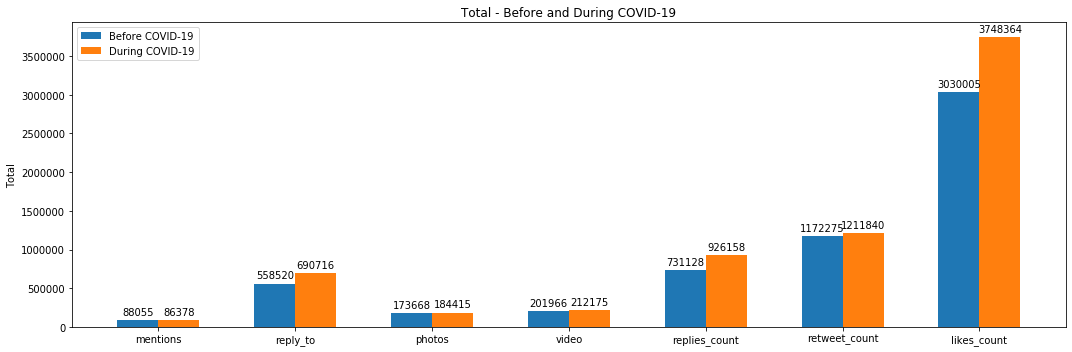

In [41]:
all_compare_time_labels = ['mentions', 'reply_to', 'photos', 'video', 'replies_count', 'retweet_count', 'likes_count']
all_user_tracing_before_covid = [all_mentions_by_user_before_covid['mentions'], all_replyto_by_user_before_covid['reply_to'], all_photos_by_user_before_covid['photos'], all_video_by_user_before_covid, all_repliescount_by_user_before_covid, all_retweetscount_by_user_before_covid, all_likescount_by_user_before_covid]
all_user_tracing_during_covid = [all_mentions_by_user_during_covid['mentions'], all_replyto_by_user_during_covid['reply_to'], all_photos_by_user_during_covid['photos'], all_video_by_user_during_covid,all_repliescount_by_user_during_covid, all_retweetscount_by_user_during_covid, all_likescount_by_user_during_covid]

x = np.arange(len(all_compare_time_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((15, 5)))
rects1 = ax.bar(x - width/2, all_user_tracing_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, all_user_tracing_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Total - Before and During COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(all_compare_time_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

Mendefenisikan perbedaan jumlah mentions, reply_to, photos, video, replies_count, retweet_count, dan likes_count dari setiap user sebelum COVID-19

In [42]:
username = 'hidayathhp'

#jumlahkan mentions keseluruhan
user_mentions_notnull_before_covid = tweet_data_before_covid_df[(tweet_data_before_covid_df['mentions'] != '[]') & (tweet_data_before_covid_df['username'] == username)]
user_mentions_by_user_before_covid = user_mentions_notnull_before_covid['mentions'].count()

#jumlahkan reply_to keseluruhan
user_replyto_notnull_before_covid = tweet_data_before_covid_df[(tweet_data_before_covid_df['reply_to'] != '[]') & (tweet_data_before_covid_df['username'] == username)]
user_replyto_by_user_before_covid = user_replyto_notnull_before_covid['reply_to'].count()

#jumlahkan share foto per user
user_photos_notnull_before_covid = tweet_data_before_covid_df[(tweet_data_before_covid_df['photos'] != '[]') & (tweet_data_before_covid_df['username'] == username)]
user_photos_by_user_before_covid = user_photos_notnull_before_covid['photos'].count()

user_video_notnull_before_covid = tweet_data_before_covid_df[(tweet_data_before_covid_df['username'] == username)]

#jumlahkan share video per user
user_video_by_user_before_covid = user_video_notnull_before_covid['video'].sum()

#jumlahkan replies_count keseluruhan
user_repliescount_by_user_before_covid = user_video_notnull_before_covid["replies_count"].sum()

#jumlahkan retweets_count keseluruhan
user_retweetscount_by_user_before_covid = user_video_notnull_before_covid["retweets_count"].sum()

#jumlahkan likes_count keseluruhan
all_likescount_by_user_before_covid = user_video_notnull_before_covid["likes_count"].sum()

Mendefenisikan perbedaan jumlah mentions, reply_to, photos, video, replies_count, retweet_count, dan likes_count dari setiap user saat COVID-19

In [43]:
username = 'hidayathhp'

#jumlahkan mentions keseluruhan
user_mentions_notnull_during_covid = tweet_data_during_covid_df[(tweet_data_during_covid_df['mentions'] != '[]') & (tweet_data_during_covid_df['username'] == username)]
user_mentions_by_user_during_covid = user_mentions_notnull_during_covid['mentions'].count()

#jumlahkan reply_to keseluruhan
user_replyto_notnull_during_covid = tweet_data_during_covid_df[(tweet_data_during_covid_df['reply_to'] != '[]') & (tweet_data_during_covid_df['username'] == username)]
user_replyto_by_user_during_covid = user_replyto_notnull_during_covid['reply_to'].count()

#jumlahkan share foto per user
user_photos_notnull_during_covid = tweet_data_during_covid_df[(tweet_data_during_covid_df['photos'] != '[]') & (tweet_data_during_covid_df['username'] == username)]
user_photos_by_user_during_covid = user_photos_notnull_during_covid['photos'].count()

user_video_notnull_during_covid = tweet_data_during_covid_df[(tweet_data_during_covid_df['username'] == username)]

#jumlahkan share video per user
user_video_by_user_during_covid = user_video_notnull_during_covid['video'].sum()

#jumlahkan replies_count keseluruhan
user_repliescount_by_user_during_covid = user_video_notnull_during_covid["replies_count"].sum()

#jumlahkan retweets_count keseluruhan
user_retweetscount_by_user_during_covid = user_video_notnull_during_covid["retweets_count"].sum()

#jumlahkan likes_count keseluruhan
all_likescount_by_user_during_covid = user_video_notnull_during_covid["likes_count"].sum()

b. Melihat grafik perbedaan jumlah mentions, reply_to, photos, video, replies_count, retweet_count, dan likes_count dari suatu user tertentu

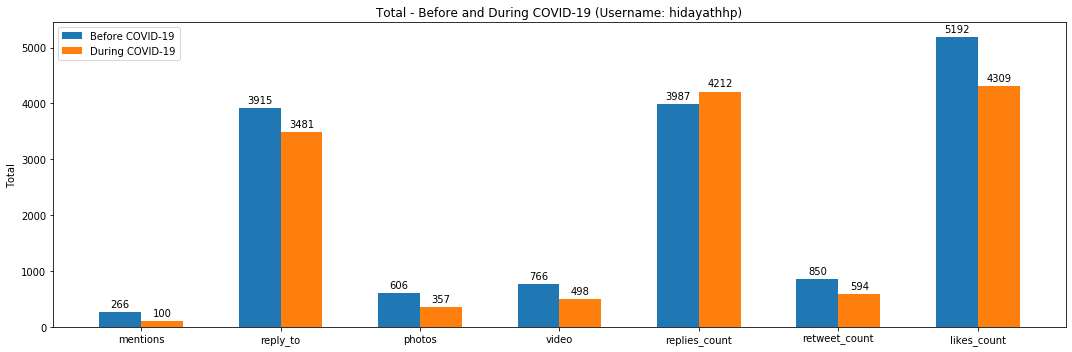

In [44]:
user_compare_user_time_labels = ['mentions', 'reply_to', 'photos', 'video', 'replies_count', 'retweet_count', 'likes_count']
user_tracing_before_covid = [user_mentions_by_user_before_covid, user_replyto_by_user_before_covid, user_photos_by_user_before_covid, user_video_by_user_before_covid, user_repliescount_by_user_before_covid, user_retweetscount_by_user_before_covid, all_likescount_by_user_before_covid]
user_tracing_during_covid = [user_mentions_by_user_during_covid, user_replyto_by_user_during_covid, user_photos_by_user_during_covid, user_video_by_user_during_covid, user_repliescount_by_user_during_covid, user_retweetscount_by_user_during_covid, all_likescount_by_user_during_covid]

x = np.arange(len(user_compare_user_time_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((15, 5)))
rects1 = ax.bar(x - width/2, user_tracing_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, user_tracing_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title(f'Total - Before and During COVID-19 (Username: {username})')
ax.set_xticks(x)
ax.set_xticklabels(user_compare_user_time_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

**Melihat Karakteristik Tweet**

**1. Berdasarkan Lokasi Postingan**

a. Melihat jumlah postingan yang menyertakan titik lokasi

In [45]:
print('Data sebelum COVID-19')
print('Jumlah Seluruh Data:', tweet_data_before_covid_df['place'].count())
print('Jumlah Postingan dengan Titik Lokasi:', tweet_data_before_covid_df['place'].notnull().sum())
print('')
print('Data saat COVID-19')
print('Jumlah Seluruh Data:', tweet_data_during_covid_df['place'].count())
print('Jumlah Postingan dengan Titik Lokasi:', tweet_data_during_covid_df['place'].notnull().sum())

Data sebelum COVID-19
Jumlah Seluruh Data: 102709
Jumlah Postingan dengan Titik Lokasi: 102709

Data saat COVID-19
Jumlah Seluruh Data: 100774
Jumlah Postingan dengan Titik Lokasi: 100774


**Berdasarkan Bahasa**

2.Melihat variasi bahasa yang digunakan saat melakukan tweet

In [46]:
print('Data sebelum COVID-19:', tweet_data_before_covid_df['language'].unique())
print('Data saat COVID-19:', tweet_data_during_covid_df['language'].unique())

Data sebelum COVID-19: ['in' 'ja' 'en' 'tl' 'et' 'und' 'tr' 'ht' 'de' 'es' 'eu' 'cy' 'hi' 'fr'
 'pt' 'no' 'lt' 'ca' 'sv' 'lv' 'pl' 'hu' 'ar' 'nl' 'ro' 'cs' 'it' 'da'
 'is' 'fi' 'ko' 'zh' 'sl' 'th' 'vi' 'ru' 'el' 'uk' 'si' 'iw' 'ta' 'mr'
 'ne' 'fa' 'bg' 'ur' 'kn']
Data saat COVID-19: ['in' 'en' 'und' 'ar' 'tl' 'tr' 'de' 'es' 'ht' 'ja' 'eu' 'hi' 'et' 'pt'
 'fi' 'no' 'sl' 'nl' 'fr' 'it' 'vi' 'cy' 'sv' 'pl' 'hu' 'da' 'lv' 'lt'
 'ro' 'ko' 'th' 'cs' 'ca' 'is' 'zh' 'ru' 'ne' 'el' 'fa' 'ml' 'ug' 'bn'
 'sd' 'ta' 'pa' 'my' 'uk' 'iw' 'ur']


In [47]:
print('Data sebelum COVID-19:', tweet_data_before_covid_df['language'].nunique(), 'bahasa')
print('Data saat COVID-19:', tweet_data_during_covid_df['language'].nunique(), 'bahasa')

Data sebelum COVID-19: 47 bahasa
Data saat COVID-19: 49 bahasa


Melihat jenis 10 bahasa yang paling banyak digunakan sebelum COVID-19

In [48]:
#jumlahkan postingan yang berada setiap perbahasa 
language_before_covid_df = tweet_data_before_covid_df.groupby("language")["conversation_id"].count()

#masukkan data jumlah postingan ke dataframe
language_before_covid_df = pd.DataFrame(language_before_covid_df)
language_before_covid_df = language_before_covid_df.rename(columns={'conversation_id': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
language_before_covid_percentage = []
for i, row in language_before_covid_df.iterrows():
    language_before_covid_percentage.append(round((row['tweet_count']/language_before_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
language_before_covid_df['percentage (%)'] = language_before_covid_percentage

language_before_covid_df.sort_values(by=['tweet_count'], ascending=False).head(10)

,tweet_count,percentage (%)
language,,
in,1059729,75.05
en,149505,10.59
und,104748,7.42
tl,32000,2.27
es,8035,0.57
tr,6291,0.45
ja,5823,0.41
et,5174,0.37
ht,4004,0.28


Melihat jenis 10 bahasa yang paling banyak digunakan saat COVID-19

In [49]:
#jumlahkan postingan yang berada setiap perbahasa 
language_during_covid_df = tweet_data_during_covid_df.groupby("language")["conversation_id"].count()

#masukkan data jumlah postingan ke dataframe
language_during_covid_df = pd.DataFrame(language_during_covid_df)
language_during_covid_df = language_during_covid_df.rename(columns={'conversation_id': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
language_during_covid_percentage = []
for i, row in language_during_covid_df.iterrows():
    language_during_covid_percentage.append(round((row['tweet_count']/language_during_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
language_during_covid_df['percentage (%)'] = language_during_covid_percentage

language_during_covid_df.sort_values(by=['tweet_count'], ascending=False).head(10)

,tweet_count,percentage (%)
language,,
in,1250769,77.35
en,141478,8.75
und,117249,7.25
tl,34209,2.12
es,9214,0.57
tr,7176,0.44
et,6102,0.38
ja,5848,0.36
ht,4338,0.27
